/Users/adityashah/miniconda3/envs/dl/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Performing overall signal distribution analysis...


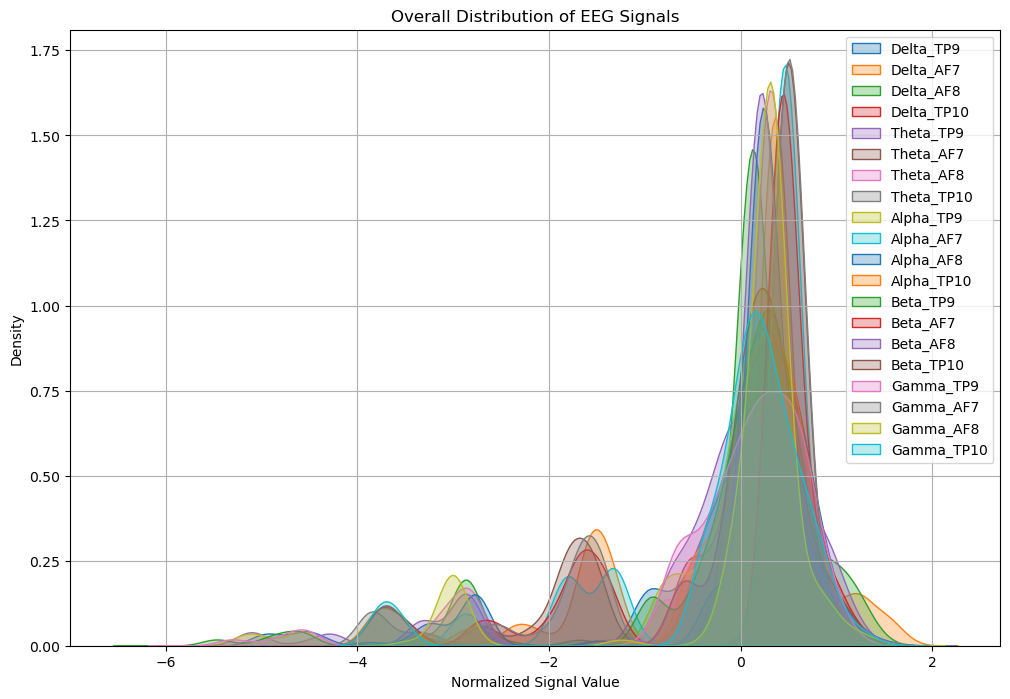

Performing signal mean and standard deviation analysis...


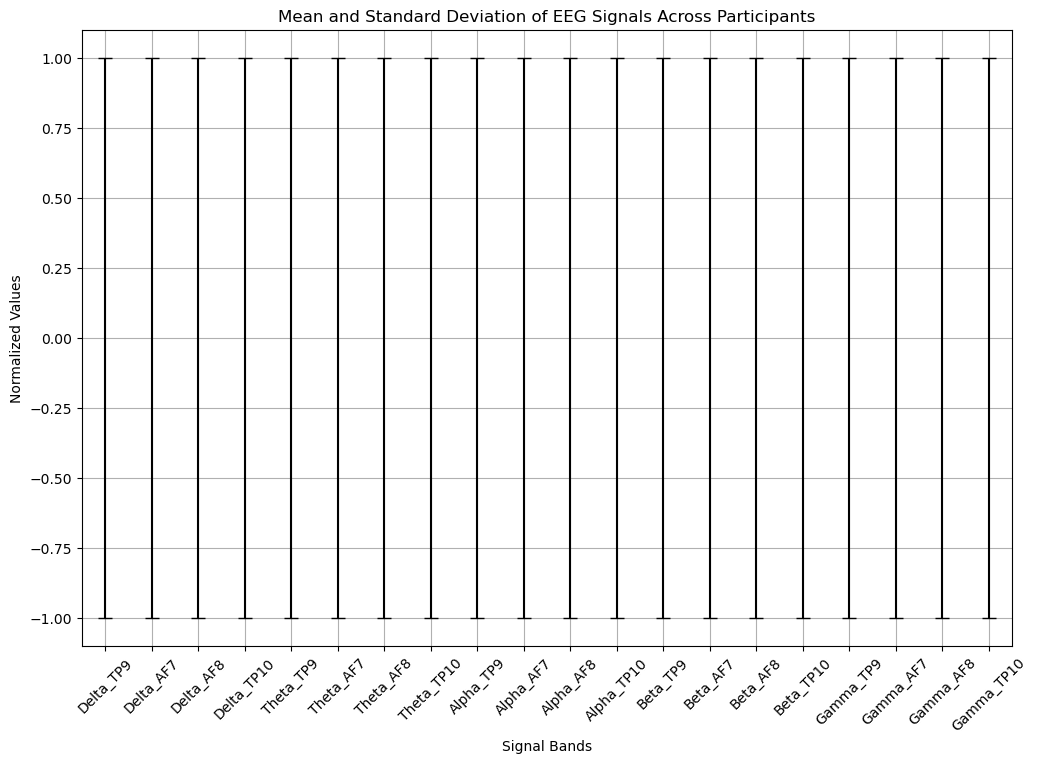

Performing signal correlation analysis...


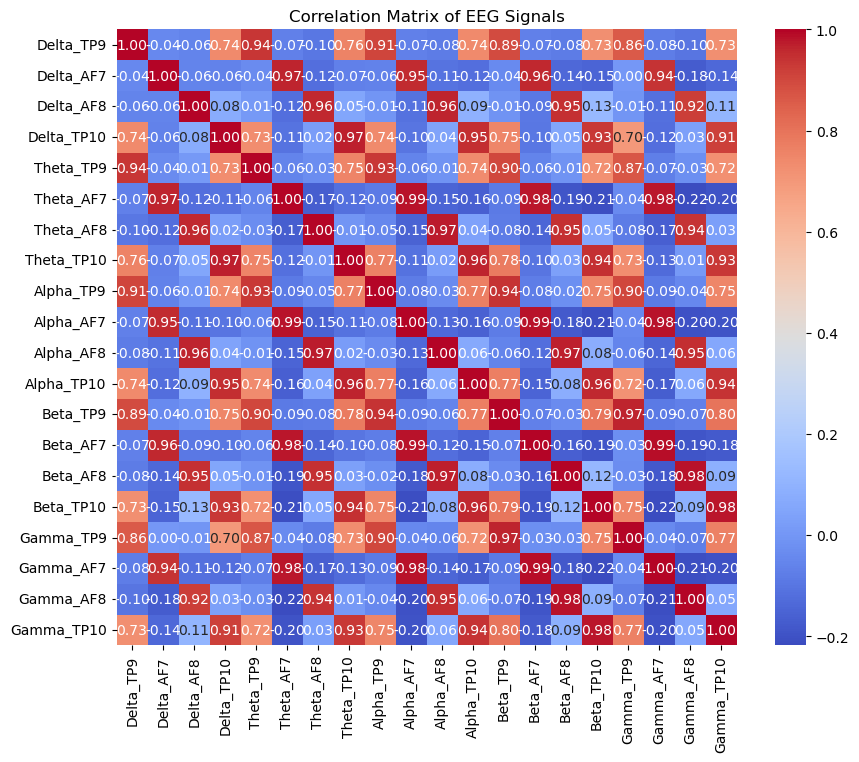

Performing time-series analysis...


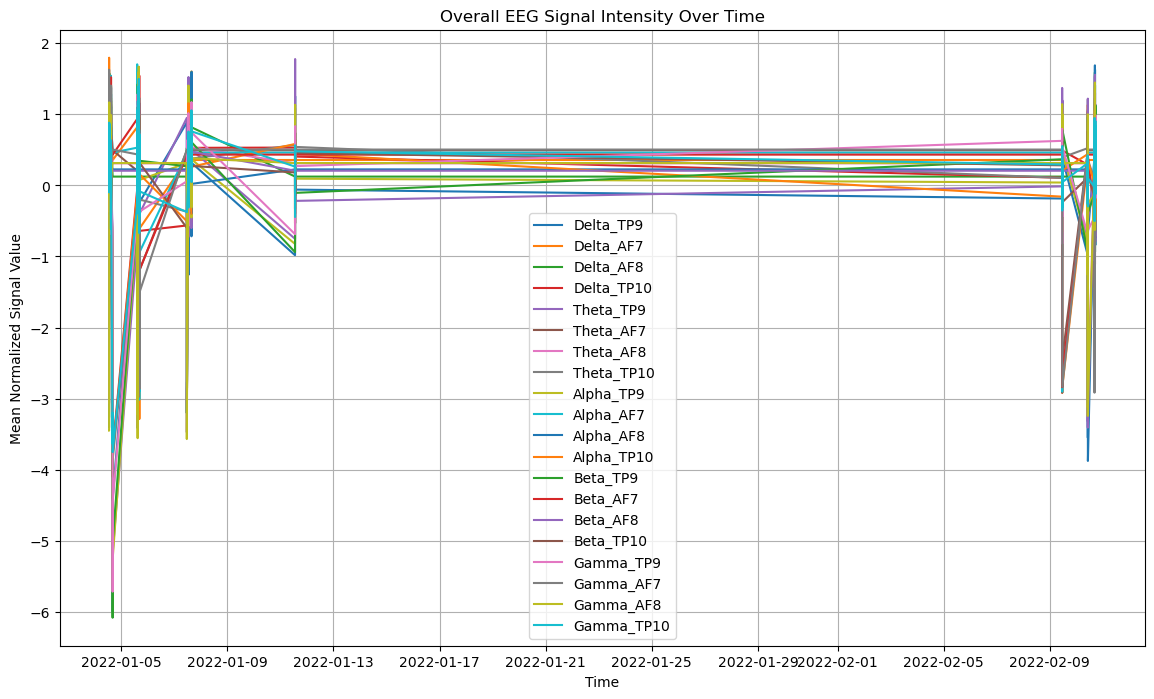

Performing signal variability heatmap analysis...


/Users/adityashah/miniconda3/envs/dl/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/adityashah/miniconda3/envs/dl/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


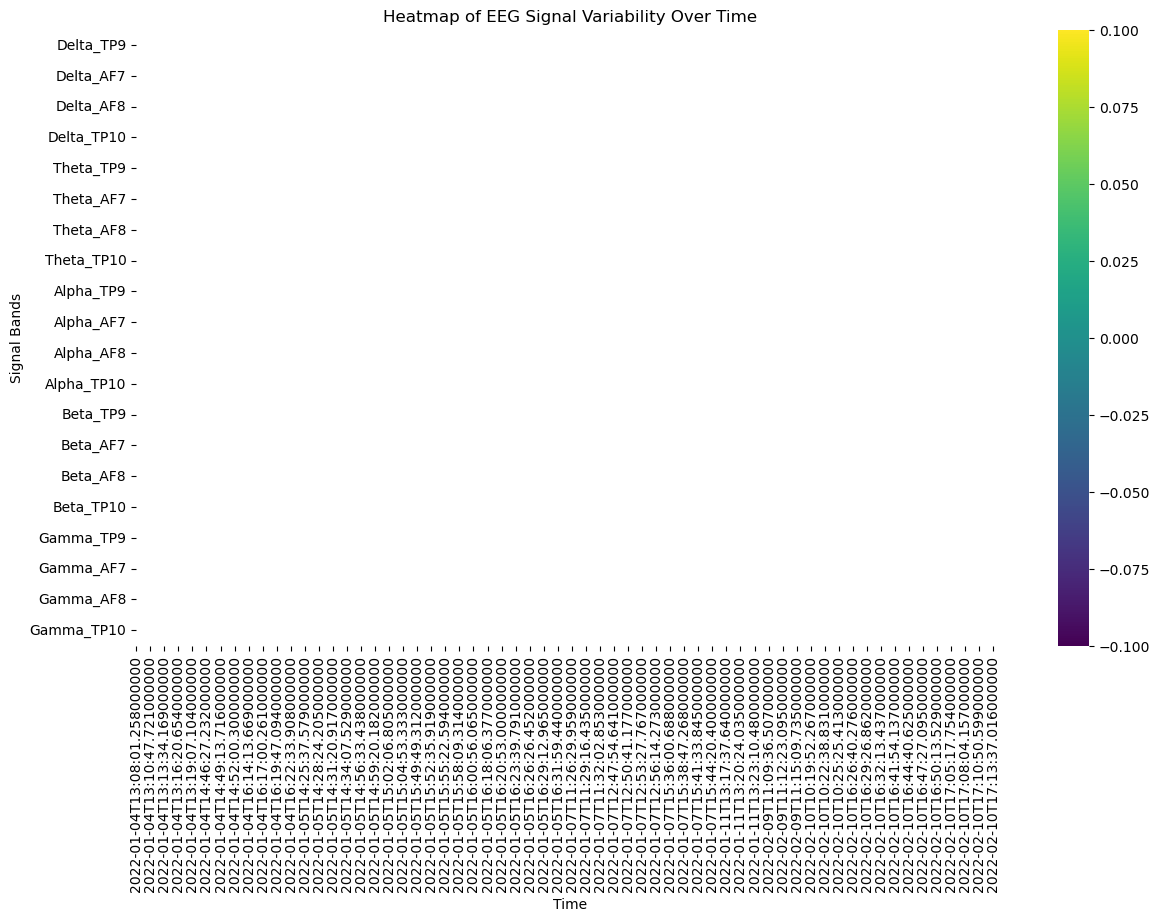

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_preprocessed_data(directory):
    """
    Load all preprocessed EEG data files from a directory.

    Args:
        directory (str): Path to the directory containing preprocessed EEG data files.

    Returns:
        pd.DataFrame: Combined DataFrame of all participants' data.
    """
    combined_data = []
    for file in os.listdir(directory):
        if file.endswith("_preprocessed.csv"):
            file_path = os.path.join(directory, file)
            participant_data = pd.read_csv(file_path, parse_dates=['TimeStamp'])
            combined_data.append(participant_data)
    return pd.concat(combined_data, ignore_index=True)

def overall_signal_distribution(preprocessed_data):
    """
    Plot the overall distribution of EEG signals.

    Args:
        preprocessed_data (pd.DataFrame): Combined preprocessed EEG data.
    """
    signal_columns = [col for col in preprocessed_data.columns if any(band in col for band in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]
    
    plt.figure(figsize=(12, 8))
    for signal in signal_columns:
        sns.kdeplot(preprocessed_data[signal], label=signal, fill=True, alpha=0.3)
    
    plt.title("Overall Distribution of EEG Signals")
    plt.xlabel("Normalized Signal Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

def signal_mean_std(preprocessed_data):
    """
    Plot the mean and standard deviation of EEG signals across participants.

    Args:
        preprocessed_data (pd.DataFrame): Combined preprocessed EEG data.
    """
    signal_columns = [col for col in preprocessed_data.columns if any(band in col for band in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]
    mean_values = preprocessed_data[signal_columns].mean()
    std_values = preprocessed_data[signal_columns].std()
    
    plt.figure(figsize=(12, 8))
    mean_values.plot(kind='bar', yerr=std_values, capsize=5, color='skyblue')
    plt.title("Mean and Standard Deviation of EEG Signals Across Participants")
    plt.xlabel("Signal Bands")
    plt.ylabel("Normalized Values")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def overall_signal_correlation(preprocessed_data):
    """
    Plot the correlation matrix of EEG signals.

    Args:
        preprocessed_data (pd.DataFrame): Combined preprocessed EEG data.
    """
    signal_columns = [col for col in preprocessed_data.columns if any(band in col for band in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]
    correlation_matrix = preprocessed_data[signal_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix of EEG Signals")
    plt.show()

def overall_signal_time_series(preprocessed_data):
    """
    Plot the aggregated time-series of EEG signals.

    Args:
        preprocessed_data (pd.DataFrame): Combined preprocessed EEG data.
    """
    signal_columns = [col for col in preprocessed_data.columns if any(band in col for band in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]
    aggregated_data = preprocessed_data.groupby('TimeStamp')[signal_columns].mean()

    plt.figure(figsize=(14, 8))
    for signal in signal_columns:
        plt.plot(aggregated_data.index, aggregated_data[signal], label=signal)
    
    plt.title("Overall EEG Signal Intensity Over Time")
    plt.xlabel("Time")
    plt.ylabel("Mean Normalized Signal Value")
    plt.legend()
    plt.grid(True)
    plt.show()

def signal_variability_heatmap(preprocessed_data):
    """
    Plot a heatmap of the variability (standard deviation) of signals over time.

    Args:
        preprocessed_data (pd.DataFrame): Combined preprocessed EEG data.
    """
    signal_columns = [col for col in preprocessed_data.columns if any(band in col for band in ["Delta", "Theta", "Alpha", "Beta", "Gamma"])]
    variability_data = preprocessed_data.groupby('TimeStamp')[signal_columns].std()

    plt.figure(figsize=(14, 8))
    sns.heatmap(variability_data.T, cmap="viridis", cbar=True)
    plt.title("Heatmap of EEG Signal Variability Over Time")
    plt.xlabel("Time")
    plt.ylabel("Signal Bands")
    plt.show()

# Main script
if __name__ == "__main__":
    preprocessed_directory = "preprocessed_data"  # Directory containing preprocessed data
    
    try:
        # Load preprocessed data
        preprocessed_data = load_preprocessed_data(preprocessed_directory)

        # Perform analysis
        print("Performing overall signal distribution analysis...")
        overall_signal_distribution(preprocessed_data)
        
        print("Performing signal mean and standard deviation analysis...")
        signal_mean_std(preprocessed_data)
        
        print("Performing signal correlation analysis...")
        overall_signal_correlation(preprocessed_data)
        
        print("Performing time-series analysis...")
        overall_signal_time_series(preprocessed_data)
        
        print("Performing signal variability heatmap analysis...")
        signal_variability_heatmap(preprocessed_data)
    
    except Exception as e:
        print(f"Error during EEG signal analysis: {e}")
